In [2]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fb/c8/9790df08b2685bf931e940fdf1207b39f394dc28b033c603f04d7e8da0cf/wordcloud-1.9.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud
from scipy.sparse import hstack
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...


True

In [4]:
# Load the data
df = pd.read_csv('37000_reviews_of_thread_app.csv')
df.head()

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us


In [5]:
print(f"{len(df)} rows")
print(f"{len(df.columns)} columns")

36943 rows
14 columns


In [6]:
column_data_types = df.dtypes

# Print the column names and their data types
for column, data_type in column_data_types.items():
    print(f"{column} - {data_type}")

Unnamed: 0 - int64
source - object
review_id - object
user_name - object
review_title - object
review_description - object
rating - int64
thumbs_up - float64
review_date - object
developer_response - float64
developer_response_date - float64
appVersion - object
laguage_code - object
country_code - object


In [7]:
# Unique values for the 'rating' column
print("Ratings are:")
unique_ratings = df['rating'].unique()
for rating in unique_ratings:
    print(rating)

Ratings are:
5
1
3
2
4


In [8]:
# Unique values for the 'Source' column
print("Sources:")
unique_sources = df['source'].unique()
for source in unique_sources:
    print(source)

Sources:
Google Play
App Store


In [9]:
# Unique values for the 'appVersion' column
print("App Versions:")
unique_versions = df['appVersion'].unique()
for version in unique_versions:
    print(version)

App Versions:
294.0.0.27.110
nan
293.0.0.30.110
292.0.0.31.110
289.0.0.77.109
291.0.0.31.111
289.0.0.68.109
291.0.0.15.111


In [8]:
# Assuming 'df' is your DataFrame
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the missing percentage for each column
for column, percentage in missing_percentage.items():
    print(f"Column: {column}, Missing Percentage: {percentage:.2f}%")

Column: Unnamed: 0, Missing Percentage: 0.00%
Column: source, Missing Percentage: 0.00%
Column: review_id, Missing Percentage: 0.00%
Column: user_name, Missing Percentage: 0.00%
Column: review_title, Missing Percentage: 94.59%
Column: review_description, Missing Percentage: 0.00%
Column: rating, Missing Percentage: 0.00%
Column: thumbs_up, Missing Percentage: 5.41%
Column: review_date, Missing Percentage: 0.00%
Column: developer_response, Missing Percentage: 100.00%
Column: developer_response_date, Missing Percentage: 100.00%
Column: appVersion, Missing Percentage: 32.72%
Column: laguage_code, Missing Percentage: 0.00%
Column: country_code, Missing Percentage: 0.00%


In [12]:
# Dropping duplicate reviews
df_unique = df.drop_duplicates(subset=['user_name', 'review_description', 'rating'])

# Optionally, you can reset the index of the DataFrame after dropping duplicates
df_unique.reset_index(drop=True, inplace=True)

In [17]:
google_play_ratings = df[df['source'] == 'Google Play']['rating'].value_counts()
app_store_ratings = df[df['source'] == 'App Store']['rating'].value_counts()

print(google_play_ratings)

5    16446
1    10651
4     3308
3     2636
2     1902
Name: rating, dtype: int64


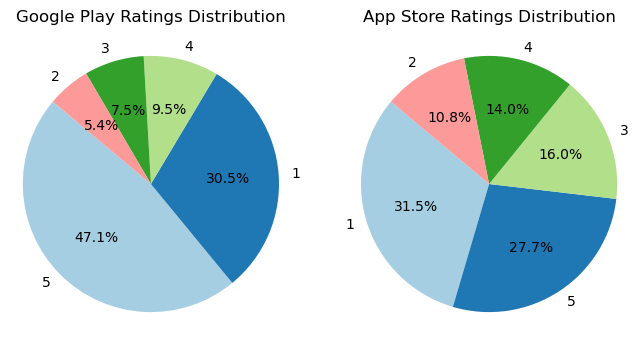

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate the data based on the source
google_play_ratings = df[df['source'] == 'Google Play']['rating'].value_counts()
app_store_ratings = df[df['source'] == 'App Store']['rating'].value_counts()

# Create two pie charts for the respective sources
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Google Play
axs[0].pie(google_play_ratings, labels=google_play_ratings.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(google_play_ratings))))
axs[0].set_title('Google Play Ratings Distribution')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for App Store
axs[1].pie(app_store_ratings, labels=app_store_ratings.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(app_store_ratings))))
axs[1].set_title('App Store Ratings Distribution')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plots
plt.show()


In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to handle negations
def handle_negations(text):
    negations = {"not", "no", "never", "n't", "cannot", "neither", "nor"}
    words = text.split()
    negated_text = []
    negate = False
    for word in words:
        if negate and word.isalpha():
            negated_text.append(f"not_{word}")
        else:
            negated_text.append(word)
        if word in negations or word.endswith("n't"):
            negate = True
        if word.endswith(('.', '!', '?')):
            negate = False
    return ' '.join(negated_text)

# Enhanced Preprocessing Function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Handle negations
    text = handle_negations(text)

    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenization and Lemmatization (not using Spacy)
    words = text.split()
    lemmatized = [word for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    without_stopwords = [word for word in lemmatized if word not in stop_words]

    # Rejoin words
    return ' '.join(without_stopwords)

# Apply the preprocessing to each review
df['preprocessed_reviews'] = df['review_description'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
print(preprocess_text("This is awesome!"))

awesome


In [30]:
# Filter out rows with empty or whitespace-only preprocessed reviews
df = df[df['preprocessed_reviews'].apply(lambda x: x.strip() != '')]

# Optionally, you can reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)


In [31]:
df.head(20)

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code,preprocessed_reviews
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us,good
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us,weak copy twitter
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us,wish threads save button images videos would l...
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us,love
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us,god
5,5,Google Play,950acab8-bc92-4e1e-81c4-3f228ccc7362,Samim Khan,NaN,Nice,1,0.0,2023-08-07 18:03:09,NaN,NaN,NaN,en,us,nice
6,6,Google Play,aac2791c-decd-40b4-9dfc-8294ed930ef8,BEEPA beepa,NaN,Vain,1,0.0,2023-08-07 17:56:02,NaN,NaN,NaN,en,us,vain
7,7,Google Play,94ae5084-c84b-4169-a099-f5b44241ffeb,CHAKKUMTHODIYIL RAMUKRISHNA,NaN,Not satisfied why this app...,1,0.0,2023-08-07 17:41:13,NaN,NaN,294.0.0.27.110,en,us,notsatisfied notwhy notthis app
8,8,Google Play,604bbfb7-2926-474e-83cb-561d9c52672a,Howie Day,NaN,People want to leave twitter for this waste of...,1,0.0,2023-08-07 17:40:57,NaN,NaN,294.0.0.27.110,en,us,people want leave twitter waste time
9,9,Google Play,5fbf93e7-e8d5-4a45-99a8-8a1aff1435c9,Antaripッ,NaN,Copy of Twitter hahaha lol,1,0.0,2023-08-07 17:32:08,NaN,NaN,NaN,en,us,copy twitter hahaha lol


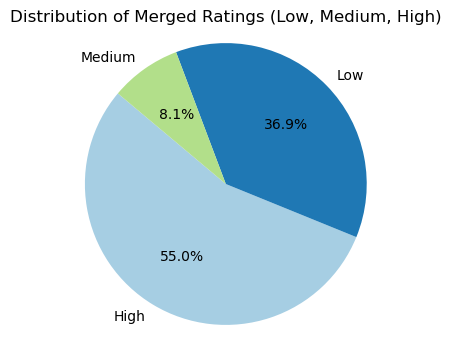

In [33]:
# Replace the ratings with merged categories
df['rating'] = df['rating'].replace({1: 'Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'High'})

# Count the occurrences of each merged category
rating_counts = df['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(rating_counts))))
plt.title('Distribution of Merged Ratings (Low, Medium, High)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [35]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)

# Fit and transform the preprocessed text data into TF-IDF vectors
X = tfidf_vectorizer.fit_transform(df['preprocessed_reviews'])

# One-hot encode the 'source' column
onehot_encoder = OneHotEncoder()
source_encoded = onehot_encoder.fit_transform(df[['source']])

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the preprocessed text data into TF-IDF vectors
X_text = tfidf_vectorizer.fit_transform(df['preprocessed_reviews'])

# Combine the TF-IDF vectors with the one-hot encoded 'source' column
X = hstack((X_text, source_encoded))

# Assuming your target variable is in df['rating']
y = df['rating']

In [36]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import random

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

def synonym_replacement(sentence, n):
    words = word_tokenize(sentence)
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word.isalnum()]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break

    sentence = ' '.join(new_words)
    return sentence

def augment_text(text, augment_times=1, synonyms_per_word=3):
    augmented_texts = []
    for _ in range(augment_times):
        augmented_texts.append(synonym_replacement(text, synonyms_per_word))
    return augmented_texts

In [48]:
# Assuming you have defined the synonym_replacement function

text = "The quick brown fox jumps over the lazy dog."
augmented_texts = synonym_replacement(text,2)

print(augmented_texts)
# Print the augmented texts
#for i, augmented_text in enumerate(augmented_texts):
#    print(f"Augmented Text {i + 1}: {augmented_text}")


The quick browned dodger jumps over the lazy dog .


In [70]:
import pandas as pd

# Identify the minority class
minority_class = df['rating'].value_counts().idxmin()

# Filter the minority class data
minority_data = df[df['rating'] == minority_class]
print(minority_data)

# Assume 'review_description' is the column with text data
text_column = 'review_description'  # Replace with the correct column name

# Data Augmentation on Minority Class
augmented_data = []
for text in minority_data[text_column]:
    augmented_texts = augment_text(text, augment_times=1, synonyms_per_word=6)
    augmented_data.extend([(new_text, minority_class) for new_text in augmented_texts])

# Convert augmented data into a DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=[text_column, 'rating'])

# Combine original data with augmented data
balanced_df = pd.concat([df, augmented_df])

balanced_df.head()

       Unnamed: 0       source                             review_id  \
2               2  Google Play  91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8   
36             37  Google Play  1dd165ca-1592-4729-a94b-7d53c2a63d3a   
65             66  Google Play  ad10949f-9b70-4631-b923-921a1604ce3d   
70             71  Google Play  fb7c1853-abc7-4144-8670-2440a9bff4f1   
72             73  Google Play  df210aa8-718d-41a5-9674-2375452b4528   
...           ...          ...                                   ...   
35798        1969    App Store  620b6626-8fd4-48cc-8812-f034937ef73c   
35800        1971    App Store  6e99d504-1574-4854-a862-f4827c45fbe4   
35809        1980    App Store  9b4b68a6-f0c9-42fc-b602-0a519090f727   
35812        1983    App Store  52589a57-7c92-49bf-914f-3abf59d0bd51   
35815        1986    App Store  cc8b8fb7-a0c4-4927-9bcf-6f24d2f73444   

                        user_name                                review_title  \
2      SITI NUR HAFIZA BINTI AZIZ                     

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code,preprocessed_reviews
0,0.0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,High,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us,good
1,1.0,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,Low,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us,weak copy twitter
2,2.0,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,Medium,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us,wish threads save button images videos would l...
3,3.0,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,High,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us,love
4,4.0,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,High,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us,god


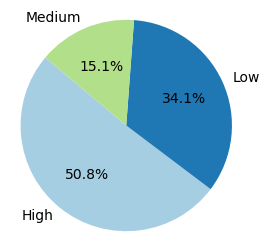

In [71]:
# Replace the ratings with merged categories
balanced_df['rating'] = balanced_df['rating'].replace({1: 'Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'High'})

# Count the occurrences of each merged category
rating_counts = balanced_df['rating'].value_counts()

# Create a pie chartx`
plt.figure(figsize=(3,3))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(rating_counts))))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [39]:
# Preprocessing the reviews
balanced_df['preprocessed_reviews'] = balanced_df['review_description'].apply(preprocess_text)

# Create a TF-IDF vectorizer and transform the preprocessed text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(balanced_df['preprocessed_reviews'])

# One-hot encode the 'source' column
onehot_encoder = OneHotEncoder()
source_encoded = onehot_encoder.fit_transform(balanced_df[['source']])

# Combine the TF-IDF vectors with the one-hot encoded 'source' column
X = hstack((tfidf_features, source_encoded))

# Splitting the data into training and testing sets
y = balanced_df['rating']

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
from scipy import sparse

def perform_stratified_cv(model, X, y, n_splits=5):
   
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    all_true_labels = []
    all_predictions = []

    # Convert X to a DataFrame if it's a sparse matrix
    if sparse.issparse(X):
        X = pd.DataFrame.sparse.from_spmatrix(X)

    # Reset indices to ensure alignment
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        all_true_labels.extend(y_test)
        all_predictions.extend(y_pred)
   

    average_accuracy = np.mean(accuracies)
    overall_classification_report = classification_report(all_true_labels, all_predictions, zero_division=0)
    
    return average_accuracy, overall_classification_report


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
average_accuracy, reports = perform_stratified_cv(decision_tree_model, X, y)
print("Average Accuracy:", average_accuracy)
print("Overall Classification Report:\n", reports)

Average Accuracy: 0.7684516166052308
Overall Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.87      0.82     19691
         Low       0.74      0.66      0.70     13218
      Medium       0.80      0.71      0.75      8754

    accuracy                           0.77     41663
   macro avg       0.77      0.75      0.76     41663
weighted avg       0.77      0.77      0.77     41663



In [42]:
# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
average_accuracy, reports = perform_stratified_cv(rf_model, X, y)
print("Average Accuracy:", average_accuracy)
print("Overall Classification Report:\n", reports)

Average Accuracy: 0.8057028262887596
Overall Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.89      0.84     19691
         Low       0.74      0.76      0.75     13218
      Medium       0.97      0.68      0.80      8754

    accuracy                           0.81     41663
   macro avg       0.84      0.78      0.80     41663
weighted avg       0.82      0.81      0.80     41663



In [43]:
# Support Vector Machine (SVM)
svm_model = LinearSVC(C=0.1)
average_accuracy, reports = perform_stratified_cv(svm_model, X, y)
print("Average Accuracy:", average_accuracy)
print("Overall Classification Report:\n", reports)

Average Accuracy: 0.8114393495566995
Overall Classification Report:
               precision    recall  f1-score   support

        High       0.78      0.92      0.85     19691
         Low       0.78      0.74      0.76     13218
      Medium       0.98      0.67      0.80      8754

    accuracy                           0.81     41663
   macro avg       0.85      0.78      0.80     41663
weighted avg       0.82      0.81      0.81     41663



In [44]:
# Multinomial Naive Bayes
nb_model = MultinomialNB(alpha=1)
average_accuracy, reports = perform_stratified_cv(nb_model, X, y)
print("Average Accuracy:", average_accuracy)
print("Overall   Classification Report:\n", reports)

Average Accuracy: 0.8075749789473097
Overall   Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.90      0.84     19691
         Low       0.77      0.74      0.75     13218
      Medium       0.94      0.69      0.80      8754

    accuracy                           0.81     41663
   macro avg       0.83      0.78      0.80     41663
weighted avg       0.82      0.81      0.81     41663



In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
nb_model = MultinomialNB()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'alpha': 0.1}
Best Score: 0.7721729061193172
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ............................................alpha=1; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ............................................alpha=1; total time=   0.4s
[CV] END ..........................................alpha=100; total time=   0.2s
[CV] END ........................................alpha=0.001; total